### Simulation study for Bayesian logistic regression example

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  
sys.path.append(project_root)

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from logistic_regression.algorithms import pip_ula, sig, mypipla, mypgd, prox_pgd, proximal_map_laplace_iteration_total, proximal_map_laplace_iterative, proximal_map_laplace_approx, proximal_map_laplace_approx_total, proximal_map_uniform_new, proximal_map_uniform_my_new, pipgla
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

os.chdir(project_root)

#### Obtain synthetic dataset for Uniform prior case

The algorithm is tested on a toy example consisting of a Bayesian logistic regression task with Uniform prior for the covariates.

In [3]:
# Save the data
#data = {'design_matrix': design_matrix, 'labels': labels}
with open('logistic_regression/uniform/data_experiment_uniform.pickle', 'rb') as f:
    data_uniform_experiment = pickle.load(f)

In [4]:
# Data and design matrix
theta = 1.5
design_matrix = data_uniform_experiment['design_matrix']
labels = data_uniform_experiment['labels']

##### Proximal PGD algorithm approximately

100%|██████████| 5000/5000 [01:56<00:00, 42.86it/s] 


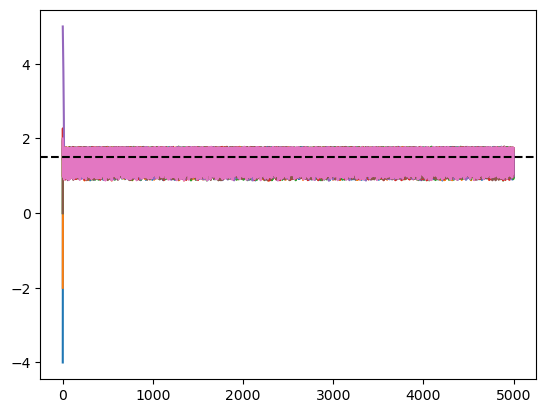

In [4]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-5, 8)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = prox_pgd(proximal_map = proximal_map_uniform_new, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, h = 0.03)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=1.5, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((np.mean(theta_ips[i][-2000:])-1.5)**2/1.5**2)

##### Moreau-Yosida PGD algorithm approximately

100%|██████████| 5000/5000 [01:55<00:00, 43.31it/s] 


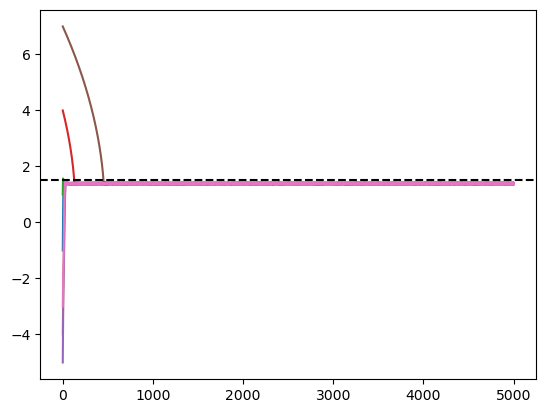

In [8]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-5, 8)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypgd(proximal_map = proximal_map_uniform_my_new, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.01, h = 0.001)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=1.5, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((np.mean(theta_ips[i][-2000:])-1.5)**2/1.5**2)

##### Proximal IPLA approximately

100%|██████████| 5000/5000 [01:50<00:00, 45.38it/s] 


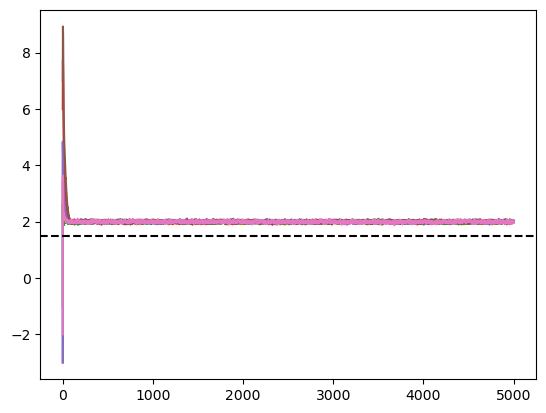

In [68]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-5, 8)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = pip_ula(proximal_map = proximal_map_uniform_new, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, h = 0.03)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=1.5, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((np.mean(theta_ips[i][-2000:])-1.5)**2/1.5**2)

##### Moreau-Yosida IPLA approximately

100%|██████████| 5000/5000 [16:17<00:00,  5.11it/s] 


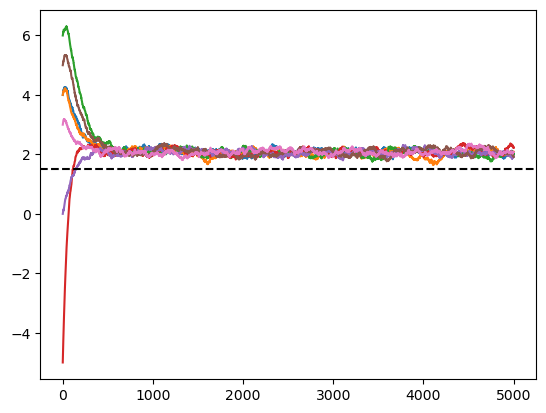

In [8]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-5, 7)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypipla(proximal_map = proximal_map_uniform_my_new, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.5, h = 0.005)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=1.5, color='black', linestyle='dashed')
plt.show()


In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((np.mean(theta_ips[i][-2000:])-1.5)**2/1.5**2)

#### PIPGLA

In [ ]:
n_particles = 50
n_iterations = 1000

fig = plt.figure()

theta_ips = []
X_ips = []
theta0 = 8
for _ in range(1):
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = pipgla(proximal_map = proximal_map_uniform_my_new, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.02, h = 0.02)
    theta0 = np.random.randint(-9, 8)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=1.5, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((np.mean(theta_ips[i][-2000:])-1.5)**2/1.5**2)